# ERP Penetrologger Plots - Python Jupyter Notebook

# Author: J. Collins
# Date of last edit: 2024-12-06



In [ ]:
# 1 PACKAGES

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.graph_objs import Scatter3d, Layout
from plotly import offline


from matplotlib import cm
from matplotlib.colors import Normalize

In [3]:
# print the current working directory to the screen
print('Get current working directory : ', os.getcwd())

Get current working directory :  /Users/u1764794/Documents/ERP/scripts/erpsoiltools/penetration_res


In [4]:
# set wd to googledrive 

os.chdir("/Users/u1764794/jcollins@earthroverprogram.org - Google Drive/Shared drives/DATA/FIELD_DEPLOYMENTS/2024-06-Joesfield/soil_data/penetration_res/")

# print the current working directory to the screen
print('Get current working directory : ', os.getcwd())

print(os.listdir("/Users/u1764794/jcollins@earthroverprogram.org - Google Drive/Shared drives/DATA/FIELD_DEPLOYMENTS/2024-06-Joesfield/soil_data/penetration_res/"))


Get current working directory :  /Users/u1764794/Library/CloudStorage/GoogleDrive-jcollins@earthroverprogram.org/Shared drives/DATA/FIELD_DEPLOYMENTS/2024-06-Joesfield/soil_data/penetration_res
['.DS_Store', '2024_05_31', 'raw_data', 'processed_data', 'data_info']


In [12]:
# Load file data (assuming all files are loaded into file_data list)
filelist = os.listdir("processed_data/")

print(filelist)

['stryde_positions_crs_4326.csv', 'long_format', '.DS_Store', 'short_format']


In [ ]:
# 3.2 LOAD DATA

def read_csv_folder(folder_path):
    """
    Reads all CSV files in the specified folder and returns them as a list of DataFrames.

    Parameters:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        list: A list of pandas DataFrames, one for each CSV file.
    """
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    dataframes = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(file_path)
            dataframes.append(df)
            print(f"Loaded {file} successfully.")
        except Exception as e:
            print(f"Error loading {file}: {e}")

    return dataframes


In [50]:
folder_path = "processed_data/short_format/"
csv_data = read_csv_folder(folder_path)
print(f"Loaded {len(csv_data)} CSV files.")

folder_path = "data_info/"
meta_data = read_csv_folder(folder_path)
print(f"Loaded {len(meta_data)} CSV files.")

Loaded 24060706_processed.csv successfully.
Loaded 24060705_processed.csv successfully.
Loaded 24060704_processed.csv successfully.
Loaded 24060703_processed.csv successfully.
Loaded 24053102_processed.csv successfully.
Loaded 24060707_processed.csv successfully.
Loaded 6 CSV files.
Loaded 24060705_processed_info.csv successfully.
Loaded 24060706_processed_info.csv successfully.
Loaded meta_info.csv successfully.
Loaded 24060703_processed_info.csv successfully.
Loaded 24060707_processed_info.csv successfully.
Loaded 24060704_processed_info.csv successfully.
Loaded 24053102_processed_info.csv successfully.
Loaded 7 CSV files.


In [ ]:
def generate_plots_simple(file_data, output_folder="plots/"):
    """
    Generates a plot for each DataFrame in the list and saves it as a PNG file.
    
    Parameters:
        file_data (list): List of pandas DataFrames containing the data.
        output_folder (str): Folder to save the plots.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for i, df in enumerate(file_data):
        try:
            # Validate required columns
            required_columns = ['depth_cm', 'mean', 'sem']  # Use a list instead of a set
            if not all(col in df.columns for col in required_columns):
                missing_columns = [col for col in required_columns if col not in df.columns]
                raise ValueError(f"file_data[{i}] is missing required columns: {missing_columns}")

            # Drop rows with missing values in required columns
            df = df.dropna(subset=required_columns)

            # Ensure columns contain valid numeric data
            for col in required_columns:
                if not pd.api.types.is_numeric_dtype(df[col]):
                    raise ValueError(f"file_data[{i}] contains non-numeric values in column: {col}")

            # Start plotting
            fig, ax = plt.subplots(figsize=(8, 6))

            # Reverse y-axis
            ax.invert_yaxis()

            # Plot ribbon (shaded area for SEM)
            ax.fill_betweenx(df['depth_cm'], 
                             df['mean'] - df['sem'], 
                             df['mean'] + df['sem'], 
                             color='grey', alpha=0.5, label='Standard Error of Mean')

            # Line and points
            ax.plot(df['mean'], df['depth_cm'], color='blue', label='Mean', linestyle='-', marker='o')

            # Extract the first value of 'project_name'
            project_name = str(df['project_name'].dropna().iloc[0])

            # Titles and labels
            title = f"{project_name} Plot"  # Use project_name in the title
            ax.set_title(f"{title}\nDeployment June 2024", fontsize=14, fontweight='bold')
            ax.set_xlabel("Penetrometer Resistance (MPa)", fontsize=12, fontweight='bold')
            ax.set_ylabel("Depth (cm)", fontsize=12, fontweight='bold')

            # Customizing legend
            ax.legend(loc='lower right')

            # Set x-axis limits
            ax.set_xlim(0, 4)

            # Save the plot using project_name as the file name
            sanitized_project_name = "".join(c if c.isalnum() else "_" for c in project_name)  # Sanitize file name
            plot_path = os.path.join(output_folder, f"{sanitized_project_name}_plot.png")
            plt.savefig(plot_path, dpi=300)
            plt.close(fig)  # Close the plot to avoid overlapping in the next iteration


            print(f"Saved plot: {plot_path}")

        except Exception as e:
            print(f"Error processing file {i}: {e}")


In [53]:
for i, df in enumerate(file_data):
    print(f"file_data[{i}] is of type: {type(df)}")

for i, df in enumerate(file_data):
    print(f"file_data[{i}] columns: {df.columns if isinstance(df, pd.DataFrame) else 'Not a DataFrame'}")


file_data[0] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[1] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[2] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[3] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[4] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[5] is of type: <class 'pandas.core.frame.DataFrame'>
file_data[0] columns: Index(['depth_cm', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', 'mean', 'stdev', 'sem', 'name'],
      dtype='object')
file_data[1] columns: Index(['depth_cm', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', 'mean', 'stdev', 'sem', 'name'],
      dtype='object')
file_data[2] columns: Index(['depth_cm', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', 'mean', 'stdev', 'sem', 'name'],
      dtype='object')
file_data[3] columns: Index(['depth_cm', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12',

In [56]:
# Example usage:
file_data = csv_data
file_info = meta_data
generate_plots_simple(file_data)


Saved plot: plots/24060706_plot.png
Saved plot: plots/24060705_plot.png
Saved plot: plots/24060704_plot.png
Saved plot: plots/24060703_plot.png
Saved plot: plots/24053102_plot.png
Saved plot: plots/24060707_plot.png


*** 2D PLOT ***


In [104]:
from matplotlib import markers
print(markers.MarkerStyle.markers.keys())

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])


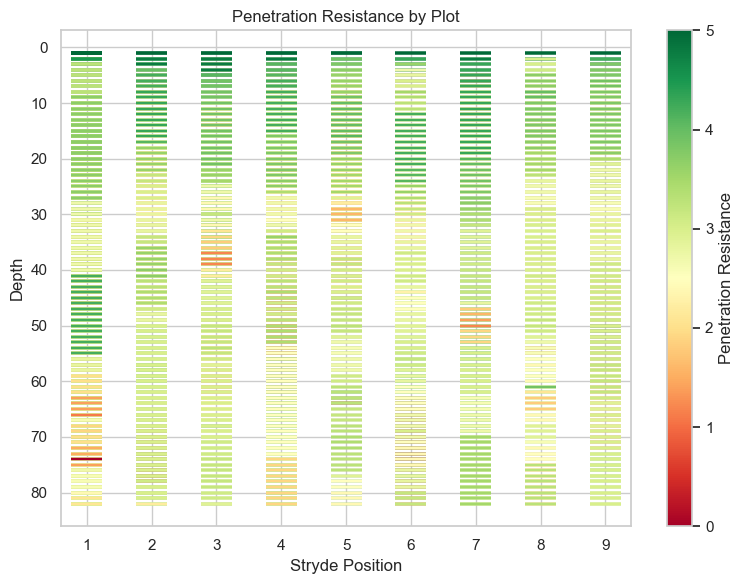

In [ ]:
# Load the data
data = pd.read_csv("processed_data/long_format_data.csv")

# Remove rows where 'penetration_resistance' is less than 0
data = data[data['penetration_resistance'] >= 0]

# Set Seaborn style
sns.set(style="whitegrid")

# Create the first plot
plt.figure(figsize=(8, 6))

scatter = sns.scatterplot(data=data, 
                          x='replicate_number', 
                          y='depth', 
                          hue='penetration_resistance',
                          palette="RdYlGn_r",  # Inverted palette 
                          marker="_",
                          s=500,  # Adjust the point size (default is 20)
                          legend=None)

# Invert y-axis
plt.gca().invert_yaxis()

# Add titles and labels
plt.title("Penetration Resistance by Plot")
plt.xlabel("Stryde Position")
plt.ylabel("Depth")

# Create colorbar using the scatter object
norm = Normalize(vmin=data['penetration_resistance'].min(), vmax=data['penetration_resistance'].max())
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])  # Empty array for colorbar
plt.colorbar(sm, label="Penetration Resistance")

# Save the first plot
plt.tight_layout()
plt.savefig("plots/p_res_by_plot.png")



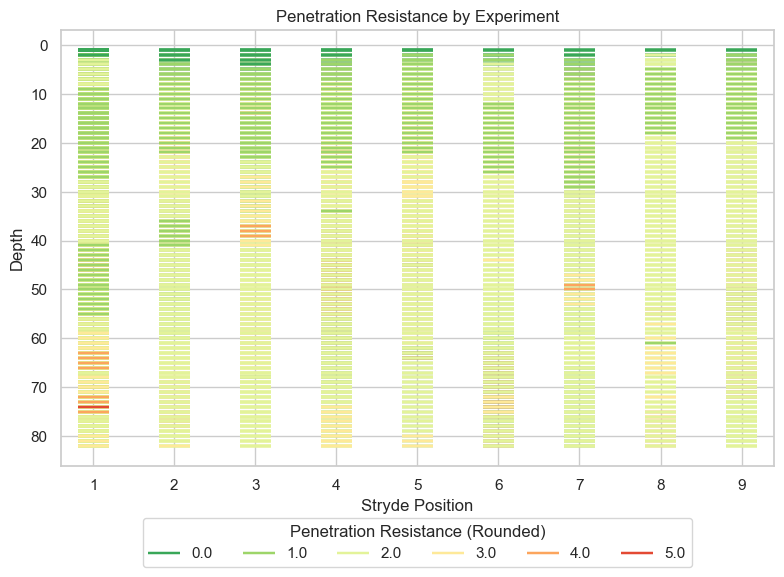

In [106]:
# Create the second plot
plt.figure(figsize=(8, 6))

# Ensure the 'Measurement' column is available
data['Measurement_rounded'] = data['penetration_resistance'].round().astype(str)  # Create a new column for the rounded Measurement

scatter_2 = sns.scatterplot(
    data=data,
    x='replicate_number',
    y='depth',
    hue='Measurement_rounded',
    palette="RdYlGn_r",  # Inverted palette 
   legend="full",
   marker="_",
    s=500  # Adjust the point size (default is 20)
)

# Invert y-axis
plt.gca().invert_yaxis()

# Add titles and labels
plt.title("Penetration Resistance by Experiment")
plt.xlabel("Stryde Position")
plt.ylabel("Depth")

# Create colorbar using the scatter object
norm = Normalize(vmin=data['penetration_resistance'].min(), vmax=data['penetration_resistance'].max())
sm_2 = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm_2.set_array([])  # Empty array for colorbar
#plt.colorbar(sm_2, label="Penetration Resistance (Rounded)")

# Display the legend at the bottom, outside the plot
plt.legend(
    title="Penetration Resistance (Rounded)",
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=6)

# Save the second plot
plt.tight_layout()
plt.savefig("plots/p_res_by_plot_2.png")

